<a href="https://colab.research.google.com/github/vanecornejo/Investigacion-de-operaciones/blob/main/Inventario%20con%20descuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inventario con descuento**

In [29]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

## **Ejemplo**
LubeCar se especializa en cambios rápidos de aceite para motor de automóvil. El servicio compra aceite para motor a granel, a **\$3** por galón. Si LubeCar compra más de 100 galones, obtiene un descuento de **\$2.50** por galón. En el servicio se atienden unos 150 autos diarios, y cada cambio de aceite requiere de 1.25 galones. LubeCar guarda el aceite a granel con un costo de **\$0.02** por galón y por día. También, el costo de colocar un pedido de aceite a granel es de **\$20**. Hay un tiempo de 2 días para la entrega. Determine la política óptima de inventario.

In [30]:
# Definimos los simbolos y funciones
c1, c2, d, h, K, L, Q, Qop, t1=sp.symbols("c1, c2, d, h, K, L, Q, Qop, t1")
T = sp.Function("T")
Qo = sp.Function("Qo")

In [31]:
# Datos del problema
c1 = 3
c2 = 2.5
d = 187.5
h = 0.02
K = 20
L = 2
q = 1000

# Qop = 612.3724

Paso 1. Calcular Q óptimo

In [32]:
def Qop(K,d,h):
    return np.sqrt((2*K*d)/h)

In [33]:
Qo = Qop(K,d,h)
Qo

np.float64(612.3724356957945)

Paso 2. Determinar la zona en que se encuentra q


In [34]:
def T(Q):
    if Q <= q:
        f=c1*d+K*d/Q+h*Q/2
    else:
        f=c2*d+K*d/Q+h*Q/2
    return f

In [35]:
eq = sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)
eq

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

In [36]:
sol=sp.solve(eq,Q)
sol

[35.4970848447485, 10564.2477865469]

In [37]:
s=sol[1]  # Aquí debemos seleccionar la solución que sea mayor que q
s

10564.2477865469

Como $ Qop = 612 < q = 1000 < Q = 10564 $, q está en la zona II. Por tanto:

$Qoo = q$


### **Ejercicio 1:**
Escriba una función que calcula la Q óptima. Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

Definimos una función que calcule la cantidad óptima de pedido considerando descuento por cantidad.

Devuelve: *Q_optimo, region, explicacion*

Regiones:

      I:   Q* ≤ q  → se usa EOQ sin descuento

      II:  Q* > q y no conviene comprar más de q → Q óptimo = q

      III: Q* > q y sí conviene comprar más de q → se resuelve la ecuación cuadrática

In [38]:
def cantidad_optima_con_descuento(K, d, h, c1, c2, q):

    Q_sin_descuento = np.sqrt(2 * K * d / h) # EOQ clásico sin descuento (usando c1)

    # Costo total si pedimos exactamente q (con descuento)
    def costo_total(Q, usar_descuento):
        c = c2 if (usar_descuento and Q >= q) else c1
        return c * d + K * d / Q + h * Q / 2

    T_q = costo_total(q, True)  # costo al pedir q (con descuento)
    T_Qsin = costo_total(Q_sin_descuento, False)  # costo del EOQ clásico

    # Región I: el EOQ sin descuento ya es menor o igual al punto de quiebre
    if Q_sin_descuento <= q:
        return Q_sin_descuento, "I", f"EOQ = {Q_sin_descuento:.2f} ≤ q → no hay descuento, usar EOQ clásico"

    # Región II o III: EOQ sin descuento > q
    # Comparamos costo de pedir q (con descuento) vs seguir con EOQ sin descuento
    if T_q < T_Qsin:
        return q, "II", f"q está en región II → conviene pedir exactamente q = {q} (con descuento)"

    # Región III: vale la pena comprar más de q para aprovechar descuento
    # Resolvemos la ecuación cuadrática: Q² + (2/h)(c2*d - T(Q*))Q + 2Kd/h = 0
    Q_star = np.sqrt(2 * K * d / h)  # este es el EOQ sin descuento
    a = 1
    b = (2/h) * (c2 * d - (c1 * d + K * d / Q_star + h * Q_star / 2))
    c = 2 * K * d / h

    # Discriminante:
    delta = b**2 - 4*a*c
    if delta < 0:
        return q, "II", "Discriminante negativo, se elige q por seguridad"

    Q1 = (-b + np.sqrt(delta)) / (2*a)
    Q2 = (-b - np.sqrt(delta)) / (2*a)

    # Seleccionamos la raíz mayor que q
    candidatos = [Q for Q in [Q1, Q2] if Q > q]
    if not candidatos:
        return q, "II", "No hay solución válida > q → se elige q"

    Q_opt = max(candidatos)

    return Q_opt, "III", f"q está en región III → solución óptima Q = {Q_opt:.2f} (> q)"

# Prueba con los datos:
Q_opt, region, explicacion = cantidad_optima_con_descuento(K, d, h, c1, c2, q)
print(f"Q óptima: {Q_opt:.2f}")
print(f"Región: {region}")
print(explicacion)

Q óptima: 612.37
Región: I
EOQ = 612.37 ≤ q → no hay descuento, usar EOQ clásico


Para calcular el tiempo de retraso efectivo

In [39]:
t1=Qo/d
np.floor(L/t1)

np.float64(0.0)

Por tanto la política del inventario debe ser:

In [40]:
print("Pedir", q, "cuando el inventario caiga a:", L*d)

Pedir 1000 cuando el inventario caiga a: 375.0


### **Ejercicio 2:**
Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.


In [41]:
def politica_inventario_optima(K, d, h, c1, c2, q, L):

    Q_opt, region, _ = cantidad_optima_con_descuento(K, d, h, c1, c2, q)
    R = d * L  # Punto de reorden
    T = Q_opt / d  # Tiempo entre pedidos

    print("         POLÍTICA ÓPTIMA DE INVENTARIO")
    print(f"Cantidad óptima de pedido (Q*)    : {Q_opt:.2f} galones")
    print(f"Región                            : {region}")
    print(f"Demanda diaria (d)                : {d:.2f} galones/día")
    print(f"Lead time (L)                     : {L} días")
    print(f"Punto de reorden (R)              : {R:.2f} galones")
    print(f"Tiempo entre pedidos              : {T:.2f} días")
    print(f"Número de pedidos por año (aprox) : {365*d/Q_opt:.1f}")
    print("-"*60)
    print(f"Pedir {Q_opt:.0f} galones cuando el inventario llegue a {R:.0f} galones")

    return {
        'Q_opt': Q_opt,
        'region': region,
        'punto_reorden': R,
        'tiempo_entre_pedidos_dias': T,
        'pedidos_anuales': 365*d/Q_opt
    }

# Ejecutar con los datos del ejemplo
politica = politica_inventario_optima(K, d, h, c1, c2, q, L)

         POLÍTICA ÓPTIMA DE INVENTARIO
Cantidad óptima de pedido (Q*)    : 612.37 galones
Región                            : I
Demanda diaria (d)                : 187.50 galones/día
Lead time (L)                     : 2 días
Punto de reorden (R)              : 375.00 galones
Tiempo entre pedidos              : 3.27 días
Número de pedidos por año (aprox) : 111.8
------------------------------------------------------------
Pedir 612 galones cuando el inventario llegue a 375 galones


Para graficar:

In [42]:
def T(Q, c1, c2, h, K, d, q):
    Q = np.array(Q)

    c = np.where(Q <= q, c1, c2)   # opciones

    return c*d + (K*d)/Q + (h*Q)/2

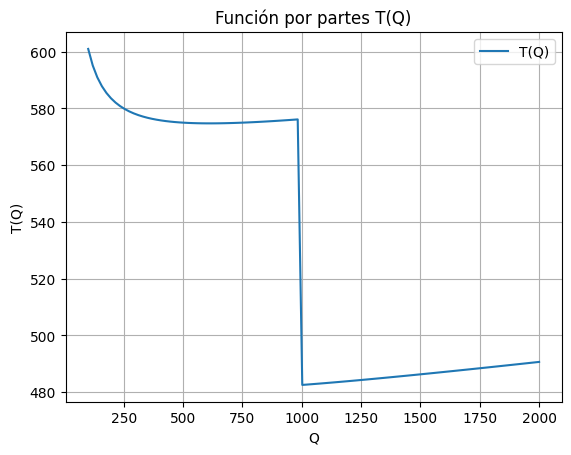

In [43]:
Q_vals = np.linspace(100, 2000, 100)

T_vals = T(Q_vals, c1, c2, h, K, d, q)

plt.plot(Q_vals, T_vals, label="T(Q)")
#plt.axvline(q, color='red', linestyle='--', label="q")  # marca el punto de quiebre

plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Función por partes T(Q)")
plt.legend()
plt.grid(True)
plt.show()